In [1]:
from plotDecBoundaries import plotDecBoundaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mean of Dataset 1:  [-0.01885789  0.07950285]
Mean of Dataset 2:  [-0.27417802  0.07180219]
Mean of Dataset 3:  [0.87008639 0.68119669]


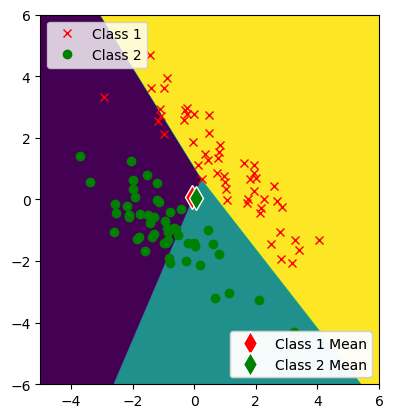

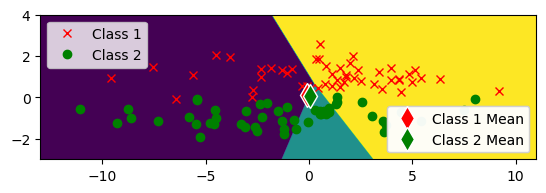

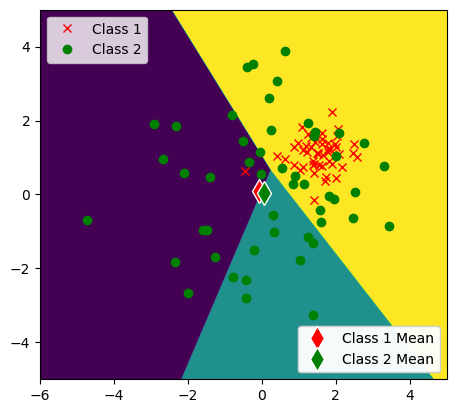

In [23]:
#reading in the train and test data using pandas
dataset1_train = pd.read_csv('dataset1_train.csv')
dataset2_train = pd.read_csv('dataset2_train.csv')
dataset3_train = pd.read_csv('dataset3_train.csv')
dataset1_test = pd.read_csv('dataset1_test.csv')
dataset2_test = pd.read_csv('dataset2_test.csv')
dataset3_test = pd.read_csv('dataset3_test.csv')

#print(dataset1_train)

#dataset 1: 
#splitting into x and y coloumns 
data1_xy = dataset1_train[['X-axis', 'Y-axis']]
#converting into a numpy array
new_arr1 = data1_xy.to_numpy()
calc_mean1 = np.mean(new_arr1, axis=0)
print("Mean of Dataset 1: ", calc_mean1)

#dataset 2: 
#splitting into x and y coloumns 
data2_xy = dataset2_train[['X-axis', 'Y-axis']]
#converting into a numpy array
new_arr2 = data2_xy.to_numpy()
calc_mean2 = np.mean(new_arr2, axis=0)
print("Mean of Dataset 2: ", calc_mean2)

#dataset 3: 
#splitting into x and y coloumns 
data3_xy = dataset3_train[['X-axis', 'Y-axis']]
#converting into a numpy array
new_arr3 = data3_xy.to_numpy()
calc_mean3 = np.mean(new_arr3, axis=0)
print("Mean of Dataset 3: ", calc_mean3)

sample_mean = np.array([class0_mean, class1_mean, calc_mean3])

#plotDecBoundaries(training, label_train, sample_mean)
plotDecBoundaries(new_arr1, dataset1_train['Class'].values, sample_mean)
plotDecBoundaries(new_arr2, dataset2_train['Class'].values, sample_mean)
plotDecBoundaries(new_arr3, dataset3_train['Class'].values, sample_mean)

In [3]:
#Calculate the distance to each class mean and assign it to the class with the closest mean between class 1 and 2
#finding which means is closer

#splitting into x and y axis
data_test1_xy = dataset1_test[['X-axis', 'Y-axis']]
data_test2_xy = dataset2_test[['X-axis', 'Y-axis']]
data_test3_xy = dataset3_test[['X-axis', 'Y-axis']]

data_test1_arr = data_test1_xy.to_numpy()
data_test2_arr = data_test2_xy.to_numpy()
data_test3_arr = data_test3_xy.to_numpy()

all_class_means = np.array([calc_mean1, calc_mean2, calc_mean3])

#calculating the Euclidean distances for training data 
euclidean_distances_train = np.linalg.norm(np.concatenate([new_arr1, new_arr2, new_arr3])[:, np.newaxis, :] - all_class_means, axis=2)
closest_mean_train = np.argmin(euclidean_distances_train, axis=1)

#calculating the Euclidean distances for test data 
euclidean_distances_test = np.linalg.norm(np.concatenate([data_test1_arr, data_test2_arr, data_test3_arr])[:, np.newaxis, :] - all_class_means, axis=2)
closest_mean_test = np.argmin(euclidean_distances_test, axis=1)

# true labels
train_true_labels = np.concatenate([dataset1_train['Class'].values, dataset2_train['Class'].values, dataset3_train['Class'].values])
ds1_test_true = dataset1_test['Class'].values
ds2_test_true = dataset2_test['Class'].values
ds3_test_true = dataset3_test['Class'].values

# number of points that were misclassified on the training set
num_misclassified_train = np.sum(closest_mean_train != train_true_labels)

# number of misclassified points on the test set
num_misclassified_test1 = np.sum(closest_mean_test[:len(data_test1_arr)] != ds1_test_true)
num_misclassified_test2 = np.sum(closest_mean_test[len(data_test1_arr):len(data_test1_arr) + len(data_test2_arr)] != ds2_test_true)
num_misclassified_test3 = np.sum(closest_mean_test[len(data_test1_arr) + len(data_test2_arr):] != ds3_test_true)

# calc total number of points on each dataset 
dataset1_test_total = len(data_test1_arr)
dataset2_test_total = len(data_test2_arr)
dataset3_test_total = len(data_test3_arr)

total_points_train = len(np.concatenate([new_arr1, new_arr2, new_arr3]))
# total_points_test = len(data_test1_arr) + len(data_test2_arr) + len(data_test3_arr)

# calc classification error rate 
error_rate_train = num_misclassified_train / total_points_train
error_rate_test1 = num_misclassified_test1 / dataset1_test_total
error_rate_test2 = num_misclassified_test2 / dataset2_test_total
error_rate_test3 = num_misclassified_test3 / dataset3_test_total

# err rate to % 
train_error_rate = error_rate_train * 100
test_error_rate1 = error_rate_test1 * 100
test_error_rate2 = error_rate_test2 * 100
test_error_rate3 = error_rate_test3 * 100

# Print or use the error rates
print("Train Set Classification Error Rate: {:.2f}%".format(train_error_rate))
print("Test Set 1 Classification Error Rate:: {:.2f}%".format(test_error_rate1))
print("Test Set 2 Classification Error Rate:: {:.2f}%".format(test_error_rate2))
print("Test Set 3 Classification Error Rate:: {:.2f}%".format(test_error_rate3))

#The reason for the discrepancies of the three data sets (1,2,3) 
#could likely be a result of a few reasons. The distribution of data in each of these 
#test sets might be very different which could be the reason that the error rate for one is higher than the other 2. 
#Additional, the data could be noisy/inconsistent which could result to it. 


Train Set Classification Error Rate: 80.67%
Test Set 1 Classification Error Rate:: 97.00%
Test Set 2 Classification Error Rate:: 76.00%
Test Set 3 Classification Error Rate:: 73.00%


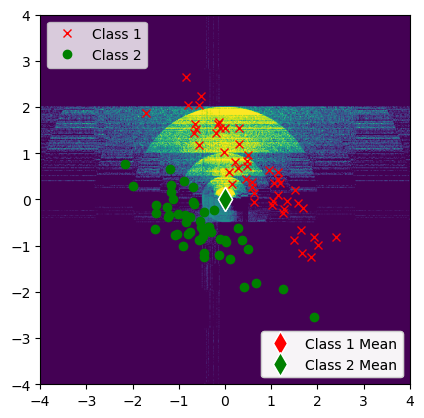

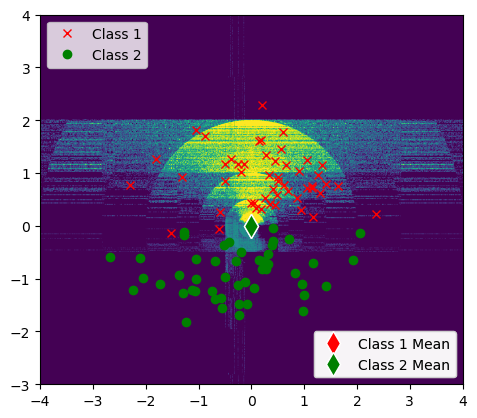

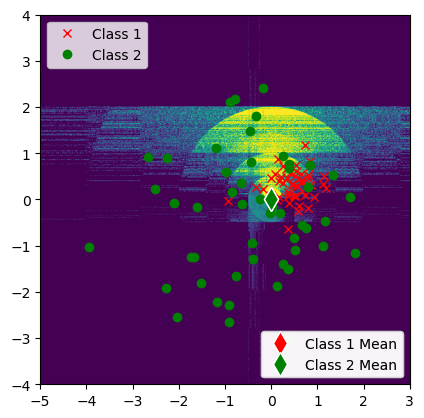

In [19]:
#preprocessing: normalization
def normalize(train_dataset, test_dataset):
    # calc the mean and standard dev of the train data 
    mean_train_dataset = np.mean(train_dataset, axis=0)
    std_train_dataset = np.std(train_dataset, axis=0)
    train_data_standardized = (train_dataset - mean_train_dataset) / std_train_dataset
    test_data_standardized = (test_dataset - mean_train_dataset) / std_train_dataset
    
    return train_data_standardized, test_data_standardized

#calc the new means on the training data 
def calc_new_mean(input_data):
    calc_mean = np.mean(input_data, axis=0)
    return calc_mean

# extract X and Y columns from the datasets
data1_xy_train = dataset1_train[['X-axis', 'Y-axis']].to_numpy()
data2_xy_train = dataset2_train[['X-axis', 'Y-axis']].to_numpy()
data3_xy_train = dataset3_train[['X-axis', 'Y-axis']].to_numpy()
data1_xy_test = dataset1_test[['X-axis', 'Y-axis']].to_numpy()
data2_xy_test = dataset2_test[['X-axis', 'Y-axis']].to_numpy()
data3_xy_test = dataset3_test[['X-axis', 'Y-axis']].to_numpy()

# call the func to standardize
ds1_train_normalized, ds1_test_normalized = normalize(data1_xy_train, data1_xy_test)
ds2_train_normalized, ds2_test_normalized = normalize(data2_xy_train, data2_xy_test)
ds3_train_normalized, ds3_test_normalized = normalize(data3_xy_train, data3_xy_test)

new_mean1 = calc_new_mean(ds1_train_normalized)
new_mean2 = calc_new_mean(ds2_train_normalized)
new_mean3 = calc_new_mean(ds3_train_normalized)

sample_mean = np.array([new_mean1, new_mean2, new_mean3])

plotDecBoundaries(ds1_train_normalized, dataset1_train['Class'].values, sample_mean)
plotDecBoundaries(ds2_train_normalized, dataset2_train['Class'].values, sample_mean)
plotDecBoundaries(ds3_train_normalized, dataset3_train['Class'].values, sample_mean)

In [9]:
#used to calc the euclidean distances + assign to closest mean of the ones found  
def euclidean_distances(input_data, calc_means):
    calc_distances = np.linalg.norm(input_data[:, np.newaxis, :] - calc_means, axis=2)
    approx_mean = np.argmin(calc_distances, axis=1)
    return approx_mean

# calc classification err rate
def classification_error(true_labels, predicted_labels):
    output = np.sum(true_labels != predicted_labels)
    err_rate = output / len(true_labels)
    return err_rate * 100 

# finding the data points in the training + test set
labels_ds1_train = euclidean_distances(ds1_train_normalized, np.array([new_mean1, new_mean2, new_mean3]))
labels_ds2_train = euclidean_distances(ds2_train_normalized, np.array([new_mean1, new_mean2, new_mean3]))
labels_ds3_train = euclidean_distances(ds3_train_normalized, np.array([new_mean1, new_mean2, new_mean3]))
labels_ds1_test = euclidean_distances(ds1_test_normalized, np.array([new_mean1, new_mean2, new_mean3]))
labels_ds2_test = euclidean_distances(ds2_test_normalized, np.array([new_mean1, new_mean2, new_mean3]))
labels_ds3_test = euclidean_distances(ds3_test_normalized, np.array([new_mean1, new_mean2, new_mean3]))

# finding the true labels of both the train and test set
ds1_train_true = dataset1_train['Class'].values
ds2_train_true = dataset2_train['Class'].values
ds3_train_true = dataset3_train['Class'].values
ds1_test_true = dataset1_test['Class'].values
ds2_test_true = dataset2_test['Class'].values
ds3_test_true = dataset3_test['Class'].values

# calc classification err rates on the train + test set
ds1_train_err= classification_error(ds1_train_true, labels_ds1_train)
ds2_train_err = classification_error(ds2_train_true, labels_ds2_train)
ds3_train_err = classification_error(ds3_train_true, labels_ds3_train)
ds1_test_err = classification_error(ds1_test_true, labels_ds1_test)
ds2_test_err = classification_error(ds2_test_true, labels_ds2_test)
ds3_test_err = classification_error(ds3_test_true, labels_ds3_test)

# print the results
print("Test Set 1 Classification Error Rate {:.2f}%".format(ds1_train_err))
print("Test Set 2 Classification Error Rate  {:.2f}%".format(ds2_train_err))
print("Test Set 3 Classification Error Rate {:.2f}%".format(ds3_train_err))

#the error rates are higher after the normalization step 
# in comparison to the unnormalized step and this 
# could be a result of a few factors. Standardizing the data to have 
# has sample mean = 0 and sample variance = 1 it might not have 
# been suitable for the three datasets given. Additionally, due to 
# more noise could have resulted in a higher rate. 

Test Set 1 Classification Error Rate 97.00%
Test Set 2 Classification Error Rate  100.00%
Test Set 3 Classification Error Rate 91.00%


Mean for train dataset4: [-0.58666755  0.53814408]
Mean for train dataset5: [-0.60513996  0.68282514]
Mean for train dataset6: [-0.10967941  1.08799118]


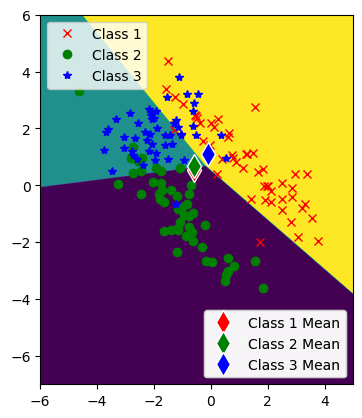

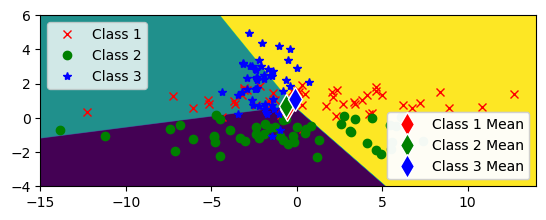

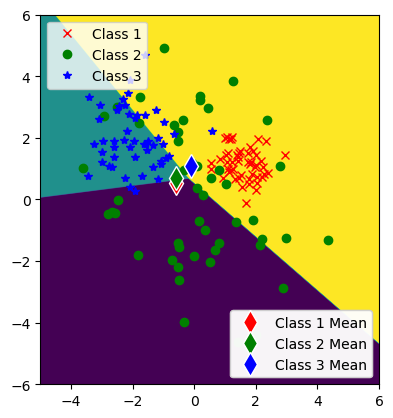

In [22]:
# Load datasets
dataset4_train = pd.read_csv('dataset4_train.csv')
dataset5_train = pd.read_csv('dataset5_train.csv')
dataset6_train = pd.read_csv('dataset6_train.csv')
dataset4_test = pd.read_csv('dataset4_test.csv')
dataset5_test = pd.read_csv('dataset5_test.csv')
dataset6_test = pd.read_csv('dataset6_test.csv')

#for (a), (b), use the unstandardized data; 
data4_xy = dataset4_train[['X-axis', 'Y-axis']]
data5_xy = dataset5_train[['X-axis', 'Y-axis']]
data6_xy = dataset6_train[['X-axis', 'Y-axis']]

# converting to numpy arrays
new_arr4 = data4_xy.to_numpy()
new_arr5 = data5_xy.to_numpy()
new_arr6 = data6_xy.to_numpy()

# calc the mean 
calc_mean4 = np.mean(new_arr4, axis=0)
calc_mean5 = np.mean(new_arr5, axis=0)
calc_mean6 = np.mean(new_arr6, axis=0)

sample_mean = np.array([calc_mean4, calc_mean5, calc_mean6])

print("Mean for train dataset4:", calc_mean4)
print("Mean for train dataset5:", calc_mean5)
print("Mean for train dataset6:", calc_mean6)
try:
    plotDecBoundaries(new_arr4, dataset4_train['Class'].values, np.array([calc_mean4, calc_mean5, calc_mean6]))
    plotDecBoundaries(new_arr5, dataset5_train['Class'].values, np.array([calc_mean4, calc_mean5, calc_mean6]))
    plotDecBoundaries(new_arr6, dataset6_train['Class'].values, np.array([calc_mean4, calc_mean5, calc_mean6]))
except IndexError as e:
    print('e')

In [33]:
#for 3 classes

def euclidean_distances_3class(input_data, calc_means):
    try:
        if isinstance(input_data, pd.DataFrame):
            input_data = input_data.to_numpy()
        calc_distances = np.linalg.norm(input_data[:, np.newaxis, :] - calc_means, axis=2)
        approx_mean = np.argmin(calc_distances, axis=1)
        return approx_mean
    except Exception as e:
        print(f"Error: {e}")
        return None

#splitting into x and y axis of the new dataset 
data_test4_xy = dataset4_test[['X-axis', 'Y-axis']]
data_test5_xy = dataset5_test[['X-axis', 'Y-axis']]
data_test6_xy = dataset6_test[['X-axis', 'Y-axis']]

#convert to numpy arrays
data_test4_arr = data_test4_xy.to_numpy()
data_test5_arr = data_test5_xy.to_numpy()
data_test6_arr = data_test6_xy.to_numpy()

class_means4 = np.array([calc_mean4, calc_mean5, calc_mean6])
class_means5 = np.array([calc_mean4, calc_mean5, calc_mean6])
class_means6 = np.array([calc_mean4, calc_mean5, calc_mean6])

# label the training set and the test set 
labels_ds4_train = euclidean_distances_3class(data4_xy, class_means4)
labels_ds5_train = euclidean_distances_3class(data5_xy, class_means5)
labels_ds6_train = euclidean_distances_3class(data6_xy, class_means6)
labels_ds4_test = euclidean_distances_3class(data_test4_arr, class_means4)
labels_ds5_test = euclidean_distances_3class(data_test5_arr, class_means5)
labels_ds6_test = euclidean_distances_3class(data_test6_arr, class_means6)

# calc error rates for training set
error_rate_train4 = classification_error(labels_ds4_train, dataset4_train['Class'].values)
error_rate_train5 = classification_error(labels_ds5_train, dataset5_train['Class'].values)
error_rate_train6 = classification_error(labels_ds6_train, dataset6_train['Class'].values)

# calc error rates for test set
error_rate_test4 = classification_error(labels_ds4_test, dataset4_test['Class'].values)
error_rate_test5 = classification_error(labels_ds5_test, dataset5_test['Class'].values)
error_rate_test6 = classification_error(labels_ds6_test, dataset6_test['Class'].values)

# print error rates
print("Classification error rate Train Dataset 4: {:.2f}%".format(error_rate_train4))
print("Classification error rate Train Dataset 5: {:.2f}%".format(error_rate_train5))
print("Classification error rate Train Dataset 6: {:.2f}%".format(error_rate_train6))
print("Classification error rate Test Dataset 4: {:.2f}%".format(error_rate_test4))
print("Classification error rate Test Dataset 5: {:.2f}%".format(error_rate_test5))
print("Classification error rate Test Dataset 6: {:.2f}%".format(error_rate_test6))

#The classification rate of the test dataset between the three 4,5,6 is significant. 
# Test dataset of 4 is immensily high however the test dataset of 5 is lower and then dataset 6 
# is even lower. This could be result of due to perhpas overlapping classes 
# or noisy data. It could also be a reason of features distribution could have caused from that. 

Classification error rate Train Dataset 4: 99.33%
Classification error rate Train Dataset 5: 78.00%
Classification error rate Train Dataset 6: 85.33%
Classification error rate Test Dataset 4: 100.00%
Classification error rate Test Dataset 5: 88.00%
Classification error rate Test Dataset 6: 84.00%


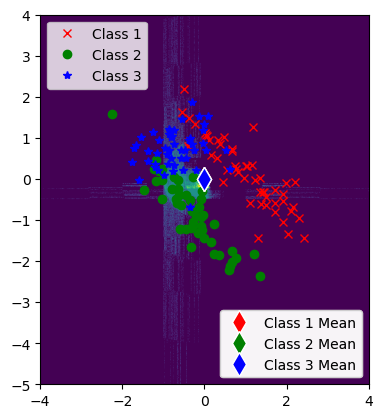

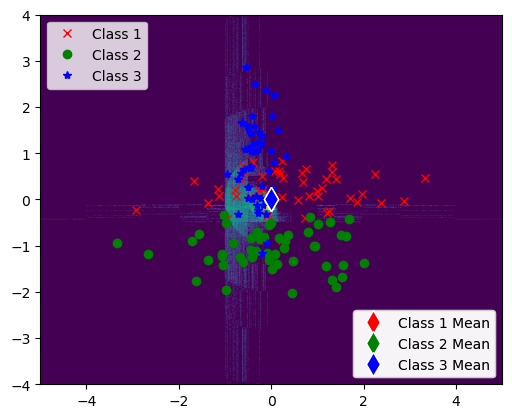

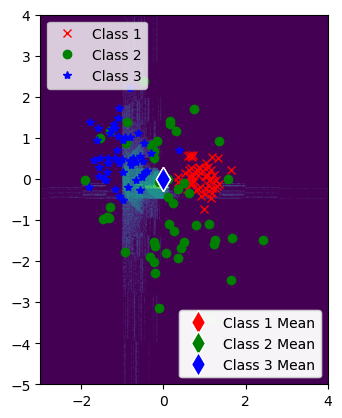

In [32]:
#normalization for 3 classes 
dataset4_train = pd.read_csv('dataset4_train.csv')
dataset5_train = pd.read_csv('dataset5_train.csv')
dataset6_train = pd.read_csv('dataset6_train.csv')
dataset4_test = pd.read_csv('dataset4_test.csv')
dataset5_test = pd.read_csv('dataset5_test.csv')
dataset6_test = pd.read_csv('dataset6_test.csv')

# extract X and Y columns from the datasets
data4_xy_train = dataset4_train[['X-axis', 'Y-axis']].to_numpy()
data5_xy_train = dataset5_train[['X-axis', 'Y-axis']].to_numpy()
data6_xy_train = dataset6_train[['X-axis', 'Y-axis']].to_numpy()
data4_xy_test = dataset4_test[['X-axis', 'Y-axis']].to_numpy()
data5_xy_test = dataset5_test[['X-axis', 'Y-axis']].to_numpy()
data6_xy_test = dataset6_test[['X-axis', 'Y-axis']].to_numpy()

# call the func to standardize
ds4_train_normalized, ds4_test_normalized = normalize(data4_xy_train, data4_xy_test)
ds5_train_normalized, ds5_test_normalized = normalize(data5_xy_train, data5_xy_test)
ds6_train_normalized, ds6_test_normalized = normalize(data6_xy_train, data6_xy_test)

new_mean4 = calc_new_mean(ds4_train_normalized)
new_mean5 = calc_new_mean(ds5_train_normalized)
new_mean6 = calc_new_mean(ds6_train_normalized)

class0_mean = new_mean4
class1_mean = new_mean5
class2_mean = new_mean6

sample_mean = np.array([class0_mean, class1_mean, class2_mean])

plotDecBoundaries(ds4_train_normalized, dataset4_train['Class'].values, sample_mean)
plotDecBoundaries(ds5_train_normalized, dataset5_train['Class'].values, sample_mean)
plotDecBoundaries(ds6_train_normalized, dataset6_train['Class'].values, sample_mean)

In [27]:
#error rates 
train_predicted_labels = euclidean_distances_3class(ds4_train_normalized, sample_mean)
test_predicted_labels_4 = euclidean_distances_3class(ds4_test_normalized, sample_mean)
test_predicted_labels_5 = euclidean_distances_3class(ds5_test_normalized, sample_mean)
test_predicted_labels_6 = euclidean_distances_3class(ds6_test_normalized, sample_mean)
true_labels_train = dataset4_train['Class'].values
true_labels_test4 = dataset4_test['Class'].values
true_labels_test5 = dataset5_test['Class'].values
true_labels_test6 = dataset6_test['Class'].values
train_error_rate = classification_error_rate(true_labels_train, train_predicted_labels)
test_error_rate4 = classification_error_rate(true_labels_test4, test_predicted_labels_4)
test_error_rate5 = classification_error_rate(true_labels_test5, test_predicted_labels_5)
test_error_rate6 = classification_error_rate(true_labels_test6, test_predicted_labels_6)

print(f"Classification Err Rate Training Set: {train_error_rate * 100:.2f}%")
print(f"Classification Err Rate Test Set 4: {test_error_rate4 * 100:.2f}%")
print(f"Classification Err Rate Test Set 5: {test_error_rate5 * 100:.2f}%")
print(f"Classification Err Rate Test Set 6: {test_error_rate6 * 100:.2f}%")

#the error rates are higher after the normalization step 
# in comparison to the unnormalized step which is similar to the case
# when there were 2 classes. Standardizing the data to have 
# has sample mean = 0 and sample variance = 1 it might not have 
# been suitable for the three datasets given. Additionally, due to 
# more noise could have resulted in a higher rate or due to overfitting. 

Classification Err Rate Training Set: 97.33%
Classification Err Rate Test Set 4: 99.33%
Classification Err Rate Test Set 5: 98.00%
Classification Err Rate Test Set 6: 100.00%
